## Support Vector Machines


Support Vector Machines (SVMs) are machine learning algorithms that are used for classification and regression purposes. SVMs are one of the powerful machine learning algorithms for classification, regression and outlier detection purposes. An SVM classifier builds a model that assigns new data points to one of the given categories. Thus, it can be viewed as a non-probabilistic binary linear classifier.

The original SVM algorithm was developed by Vladimir N Vapnik and Alexey Ya. Chervonenkis in 1963. At that time, the algorithm was in early stages with the only possibility to draw hyperplanes for a linear classifier. In 1992, Bernhard E. Boser, Isabelle M Guyon and Vladimir N Vapnik suggested a way to create non-linear classifiers by applying the **kernel trick** to maximum-margin hyperplanes. The current standard was proposed by Corinna Cortes and Vapnik in 1993 and published in 1995.

SVMs can be used for linear classification purposes. In addition to performing linear classification, SVMs can efficiently perform a non-linear classification using the kernel trick. It enable us to implicitly map the inputs into high dimensional feature spaces.
<br><br>
<img src="./svms.png"  width=40% />


### Import the libraries 
Before we import the data, let's load the necessary libraries:
#pip install (library namy)

In [30]:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn import metrics
from mlxtend.plotting import plot_decision_regions

from sklearn.svm import SVC  # import SVM classifier
from sklearn.svm import LinearSVC # for a faster implementation of the linear SVM classifier - can also use SVC and kernel='linear'

%matplotlib inline

warnings.filterwarnings("ignore") 

Built-in function to plot the boundaries of SVM based on http://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/

In [58]:
def plot_svm_boundaries(svm_model, feature_a, feature_b):
    X_combined = np.vstack((X_train, X_test))[:,(feature_a,feature_b)]
    y_combined = np.hstack((y_train, y_test))

    # Refitting the classifier with 2D data 
    svm_model.fit(X_combined, y_combined)

    fig, ax = plt.subplots(figsize=(7, 7))
    plot_decision_regions(X_combined, y_combined, clf=svm_model)
    plt.xlabel("Feature_"+ str(feature_a))
    plt.ylabel("Feature_"+ str(feature_b))
    plt.legend(loc='upper left')
    plt.title('SVM on Breast Cancer Wisconsin (Diagnostic) Data Set.')
    plt.tight_layout()
    plt.show()

### Data 

In this notebook, we will look into the [Breast Cancer Wisconsin (Diagnostic) Data Set](https://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+(diagnostic)). <br/>(Note: the dataset is provided in your Lab folder). 

1. The dataset is about the patients who were detected with 2 kinds of breast cancer : Malignant or Benign
2. The features given here are the characteristics of the cell nuclei computed from the fine needle aspirate (FNA) of a breast mass.
3. Ten real-valued features are computed for each cell nucleus as follows:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

#### Importing the data 

As with the previous Labs, we will start by loading the provided dataset "breast_cancer.csv" into a `DataFrame` named **"input_data"** using once more the function  `pd.read_csv()` (Check the pandas [read_csv() documentation](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) if needed). 
- To get acquainted with our data, let’s look at the first 5 entries using `head()`
- Check and print the dimensionality of the data using `shape`
- The dataset is provided in your Lab folder (no need to download it). 

In [32]:
# Read the data from the breast_cancer.csv file (provided in the Lab folder) into a variable named "input_data" 
# Print the dimensionality (shape) of the input_data DataFrame
# Show the first 5 rows of input_data using the function head()

input_data = pd.read_csv("./breast_cancer.csv")
print(input_data.shape)
input_data.head()

(569, 32)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


 Quite often in our analyses, we are provided with columns such identifiers (IDs), which do not contribute any or much information towards the overall analysis. We should therefore learn how to handle them. We can either set them as an index (should we think this may be of use at some point later on) or drop them. 

In [33]:
# The column 'id' contains an Identification number and does not contribute to the analysis
# We can EITHER (1) use the function set_index() to set the 'id' as a row index 
# OR use (2) drop() to remove the 'id' column (remember to set the axis argument). 
# In both cases, you could use inplace=True. If inplace=True, no assignment needs to happen. 
# Alternatively, if we do not use inplace=True, we need to assign back to "input_data". 
# Check the results once more using head() 

input_data.set_index('id', inplace=True)
input_data.head()

# Dropping the unwanted variable:
# input_data.drop('id', axis=1, inplace=True)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678



### Split the data into input variable X and class vector y

SVMs follow a similar workflow to other supervised models in `sklearn`. We need to first start by setting the `X` matrix (input feature matrix) and `y` vector (class target):

In [34]:
# Assign the feature data into a new variable named "X"  
# Extract all columns **except** from the label column using either indexing (.loc / .iloc) 
# or input_data.drop() with axis=1

X = input_data.drop('diagnosis', axis=1)

# Assign the target data (label/class column) into a new variable named "y"
# Extract only the label (class) column

y = input_data['diagnosis']

# Print the dimensions (shape) for both X and y 
print ("X dimensions: ", X.shape)
print ("y dimensions: ", y.shape)

X dimensions:  (569, 30)
y dimensions:  (569,)


### Investigate the class frequencies

An important aspect to understand before applying any classification algorithm is how the output labels are distributed. Are they evenly distributed or not? Imbalances in distribution of labels can often lead to poor classification results for the minority class even if the classification results for the majority class are very good.


In [35]:
# Use the function value_counts() on the y variable 
# in order to check the distribution of the binary class 

y.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

### Mapping (encoding) the categorical variable

In order for the class variable to be in machine-readable form and ready to be used by ML models, it needs to be encoded in a numerical format. `LabelEncoder` from `sklearn` can be used to encode target labels with value between `0` and `n_classes-1`. 

**This transformer should be used to encode target values, i.e. y, and not the input X** (in which case, we can use One Hot Encoding or other ways of encoding). Read more about [LabelEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html) and [Transforming the prediction variable(y)](https://scikit-learn.org/stable/modules/preprocessing_targets.html#preprocessing-targets)

In [36]:
# Convert the categorical values into numbers using the LabelEncoder from sklearn

# Instantiate a LabelEncoder() object and save it to a new variable "le"
le = LabelEncoder()

# Fit the label encoder "le" using fit_transform() on y (pass it as a parameter) 
# Assign back to "y". The fit_transform() function takes a categorical column 
# and converts/maps it to numerical values.
y = le.fit_transform(y)

## Supervised Learning - Classification

For every classification model built with scikit-learn, we will follow four main steps:

1. Building the classification model (using either default, pre-defined or optimized parameters)
2. Training (*fitting*) the model
3. Testing (*predicting*) the model
4. Performance evaluation using various metrics.

### Train-Test Split

Training and testing a classification model on the same dataset is a methodological mistake: a model that would just repeat the labels of the samples that it has just seen would have a perfect score but would fail to predict anything useful on yet-unseen data (poor generalisation). To use different datasets for training and testing, we need to split our dataset into two disjoint sets: train and test (Holdout method).

Use `sklearn`’s `train_test_split()` function to randomly split the data into train and test sets (visit the [train_test_split documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) and the  [model cross-validation documentation](https://scikit-learn.org/stable/modules/cross_validation.html#cross-validation)). 

In [37]:
# Use the train_test_split() function from sklearn and pass the following arguments: 
# (1) the X matrix (2) the y vector (3) test_size=0.30 (4) stratify=y (5) random_state=1 (for reproducibility)
# Assign the results into the new variables X_train, X_test, y_train, y_test (simultaneously)
# Note: when working with imbalances, it is important to stratify y when doing a train_test_split()

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    stratify=y, 
                                                    random_state=1)

# Print the dimensionality (shape) of X_train, X_test, y_train, y_test 

print('Shape of x_train and y_train: ', X_train.shape, y_train.shape)
print('Shape of x_test and y_test: ',   X_test.shape,  y_test.shape)

Shape of x_train and y_train:  (398, 30) (398,)
Shape of x_test and y_test:  (171, 30) (171,)


**Note: it’s good practice to split the train and test sets before doing any feature engineering and/or scaling to avoid data leakage.**


### Scaling 

Support Vector Machine algorithms **are not scale invariant, so it is highly recommended to scale your data**. For example, scale each attribute on the input vector X_train to [0,1] or [-1,+1], or standardize it to have mean 0 and variance 1. Note that the same scaling must be applied to the test vector to obtain meaningful results. 

In [38]:
# Instantiate the StandardScaler() or MinMaxScaler() from sklearn and store into a variable named "scaler" 
scaler = StandardScaler()

# Fit the scaler ONLY on the training data (and transform - this could be done using two separate steps/functions) 
X_train = scaler.fit_transform(X_train)

# Use the fitted scaler to transform the test data 
X_test  = scaler.transform(X_test)


### The SVM classifier


#### 1. SVM with default parameters: the RBF classifier 

Let’s start by using the default parameters. Default hyperparameter means `C=1.0`, `kernel=rbf` and `gamma=auto`. 

In [39]:
# Step 1 - Instantiate the SVC() classifier using the default parameters 
# Default hyperparameter are C=1.0, kernel=rbf and gamma=auto.
# Assign the result into a new variable named "svc"
svc = SVC() 

# Step 2 - Fit the svc model to the training set 
svc.fit(X_train,y_train)

# Step 3 - Predict the test data using the svc model 
y_pred = svc.predict(X_test)

# Step 4 - Print the final overall accuracy for the test set 
print('Test set accuracy: ', metrics.accuracy_score(y_test, y_pred))

Test set accuracy:  0.9532163742690059


In [40]:
# Print the confusion_matrix for the test set
print(metrics.confusion_matrix(y_test, y_pred))

[[105   2]
 [  6  58]]


In [41]:
# Print the classification_report for the test set 
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96       107
           1       0.97      0.91      0.94        64

    accuracy                           0.95       171
   macro avg       0.96      0.94      0.95       171
weighted avg       0.95      0.95      0.95       171



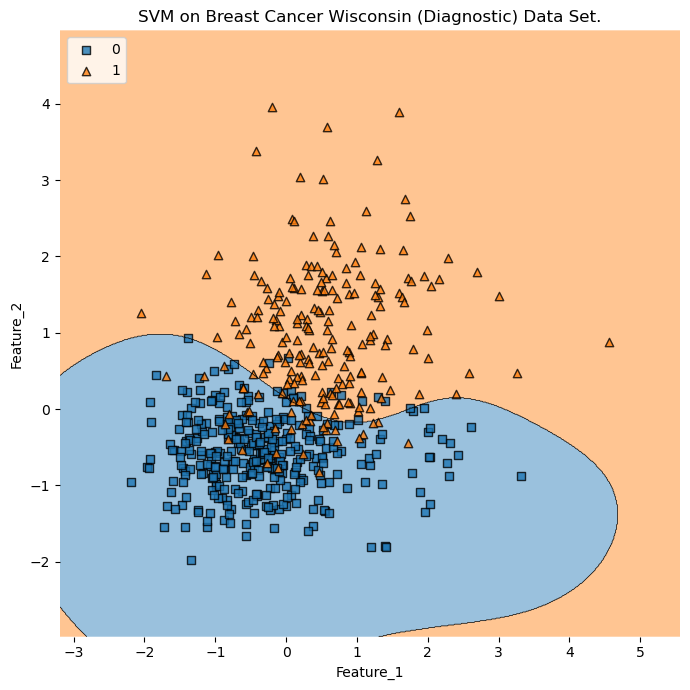

In [42]:
# Plot the SVM boundaries 
plot_svm_boundaries(svc, 1, 2)

#### 2. SVM with rbf kernel and C=100.0


Increase the `C` and set it to `C=100000`, while keeping the rest of the default parameters. See what happens to the SVM boundaries. 

In [43]:
# Step 1 - Instantiate the SVC() classifier using the pre-defined parameter "C=100000"
svc=SVC(C=100000) 

# Step 2 - Fit the svc model to the training set
svc.fit(X_train,y_train)

# Step 3 - Predict the test data using the svc model 
y_pred = svc.predict(X_test)

# Step 4 - Print the final overall accuracy for the test set
print('Test set accuracy: ', metrics.accuracy_score(y_test, y_pred))

Test set accuracy:  0.935672514619883


In [44]:
# Print the confusion_matrix for the test set 

print(metrics.confusion_matrix(y_test, y_pred))

[[104   3]
 [  8  56]]


In [45]:
# Print the classification_report for the test set 

print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95       107
           1       0.95      0.88      0.91        64

    accuracy                           0.94       171
   macro avg       0.94      0.92      0.93       171
weighted avg       0.94      0.94      0.94       171



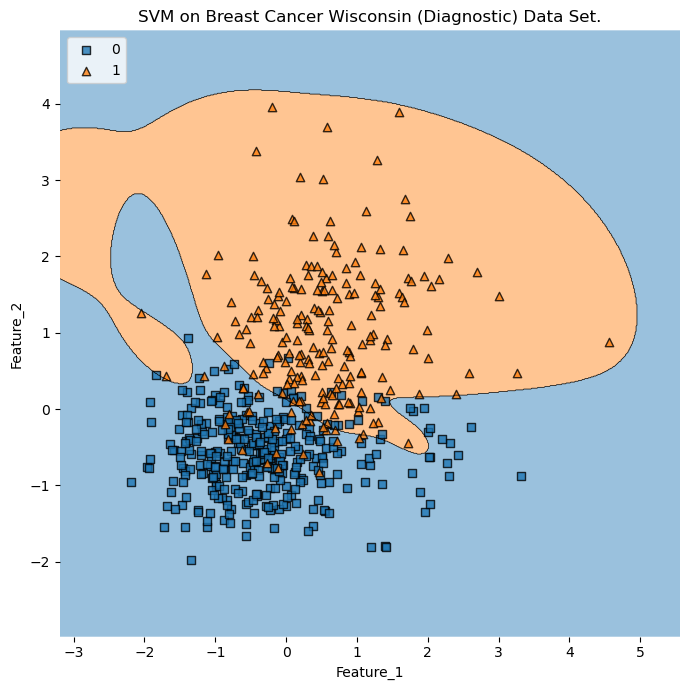

In [46]:
# Plot the SVM boundaries 
plot_svm_boundaries(svc, 1, 2)

####  3. Run SVM with polynomial kernel

In [47]:
# Step 1 - Instantiate the SVC() classifier using kernel='poly' and degree=4
poly_svc = SVC(kernel='poly', degree=4) 

# Step 2 - Fit the poly_svc model to the training set 
poly_svc.fit(X_train,y_train)

# Step 3 - Predict the test data using the poly_svc model 
y_pred = poly_svc.predict(X_test)

# Step 4 - Print the final overall accuracy for the test set 
print('Test set accuracy: ', metrics.accuracy_score(y_test, y_pred))

Test set accuracy:  0.7719298245614035


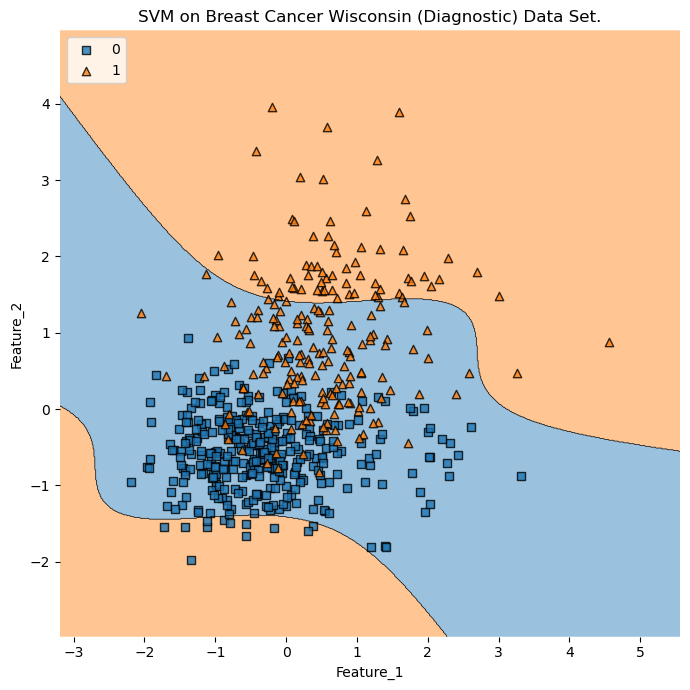

In [48]:
# Plot the SVM boundaries 
plot_svm_boundaries(poly_svc, 1, 2)

#### 4. Run SVM with linear kernel

- The `LinearSVC` class is based on the `liblinear` library, which implements an optimized algorithm for linear SVMs. It does not support the kernel trick, but it scales almost linearly with the number of training instances and the number of features: its training time complexity is roughly O(m × n). The algorithm takes longer if you require very high precision. This is controlled by the tolerance hyperparameter ϵ (called `tol` in Scikit-Learn). In most classification tasks, the default tolerance is fine.

- The `SVC` class is based on the `libsvm` library, which implements an algorithm that supports the kernel trick. The training time complexity is usually between O(m2 × n) and O(m3 × n). Unfortunately, this means that it gets very slow when the number of training instances gets large (e.g., hundreds of thousands of instances). This algorithm is perfect for complex but small or medium training sets. However, it scales well with the number of features, especially with sparse features (i.e., when each instance has few nonzero features). In this case, the algorithm scales roughly with the average number of nonzero features per instance.

Run SVM with linear kernel and C=1.0 using `SVC`

In [49]:
# Instantiate classifier with linear kernel and C=1.0
linear_svc = SVC(kernel='linear', C=1.0) 

# Step 2 - Fit the linear SVM model to the training set 
linear_svc.fit(X_train, y_train)

# Step 3 - Predict the test data 
y_pred = linear_svc.predict(X_test)

# Step 4 - Print the final overall accuracy 
print('Test set accuracy: ', metrics.accuracy_score(y_test, y_pred))

Test set accuracy:  0.9532163742690059


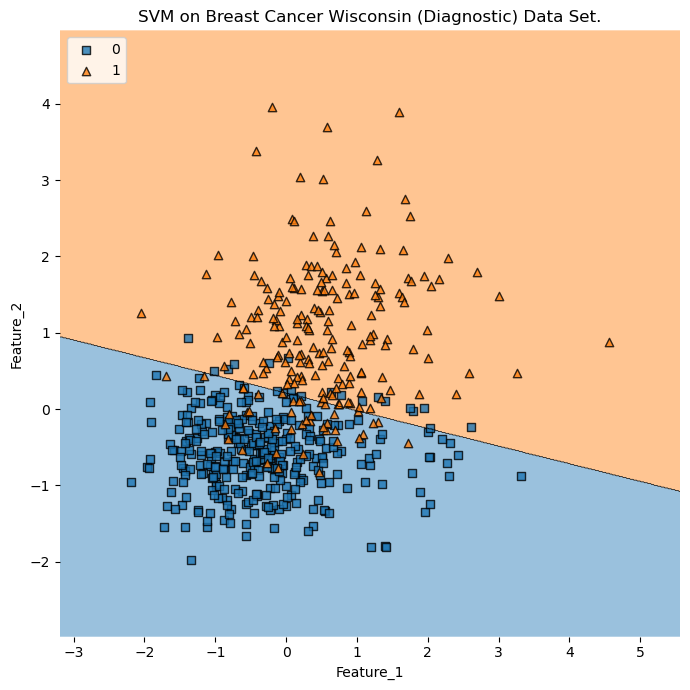

In [50]:
# Plot the SVM boundaries 
plot_svm_boundaries(linear_svc, 1, 2)

As a rule of thumb, you should always try the linear kernel first (remember that `LinearSVC` is much faster than `SVC(kernel=”linear”)` in sklearn), especially if the training set is very large or if it has plenty of features. Try the `LinearSVC` classifier with `C=1.0` and `loss="hinge"`

In [51]:
# Instantiate the LinearSVC classifier with C=1.0 and loss="hinge"
linear_svc2 = LinearSVC(C=1.0, loss="hinge") 

# Step 2 - Fit the linear SVM model to the training set 
linear_svc2.fit(X_train, y_train)

# Step 3 - Predict the test data 
y_pred = linear_svc2.predict(X_test)

# Step 4 - Print the final overall accuracy 
print('Test set accuracy: ', metrics.accuracy_score(y_test, y_pred))

Test set accuracy:  0.9532163742690059


### SVM hyperparameter tuning

#### GridSearchCV and RandomSearchCV

All classification models have a set of parameters that need to be optimised (tuned). 
- Grid search is a process that searches exhaustively through a manually specified subset of the hyperparameter space. [`GridSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) implements the most obvious way of finding an optimal value for anything — it simply tries all the possible values (that you pass) one at a time and returns which one yielded the best model results, based on the scoring that you want, such as accuracy on the validation set. 
- In contrast to GridSearchCV, with [`RandomizedSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html) method, not all parameter values are tried out, but rather a fixed number of parameter settings is sampled from the specified distributions. The number of parameter settings that are tried is given by `n_iter`.

#### SVM hyperparameter options

The following represent some of the hyperparameters that can be tuned: 

- The parameter `C`, *common to all SVM kernels*, trades off misclassification of training examples against simplicity of the decision surface. In other words `C` behaves as a regularization parameter in the SVM. A low `C` makes the decision surface smooth and will encourage a larger margin, therefore a simpler decision function, at the cost of training accuracy. For larger values of `C`, a smaller margin will be accepted if the decision function is better at classifying all training points correctly. If you have a lot of noisy observations you should decrease it: decreasing `C` corresponds to more regularization. 

- `gamma` defines how much influence a single training example has. The larger `gamma` is, the closer other examples must be to be affected (may lead to cases of over-fitting). Intuitively, the gamma parameter defines how far the influence of a single training example reaches, with low values meaning ‘far’ and high values meaning ‘close’. The gamma parameters can be seen as the inverse of the radius of influence of samples selected by the model as support vectors.

- `kernel`: It specifies the kernel type to be used in the algorithm. It can be `linear`, `poly`, `rbf`, `sigmoid`, `precomputed`, or callable. The default value is `rbf`.

- `degree`: It is the degree of the polynomial kernel function (`poly`) and is ignored by all other kernels. The default value is 3.

Proper choice of C and gamma is critical to the SVM’s performance. **One is advised to use GridSearchCV with `C` and `gamma` spaced exponentially far apart to choose good values.** Detailed information on the SVM hyperparameters can be found at https://scikit-learn.org/stable/auto_examples/svm/plot_rbf_parameters.html#sphx-glr-auto-examples-svm-plot-rbf-parameters-py 


####  SVM hyperparameter tuning 


As a first step, create a dictionary of hyperparameter ranges and conduct a grid or random search with cross-validation:

In [52]:
# Use GridSearchCV() with 5-fold or 10-fold cross-validation (cv=5 or cv=10)
# (more cv folds reduces the chances of overfitting but also increases the run time)   

# Create the dictionary of hyperparameters 
param_grid = [ {'C':[0.1, 1, 10, 100, 1000], 'kernel':['linear']},
               {'C':[0.1, 1, 10, 100, 1000], 'kernel':['rbf'], 'gamma':[1, 0.1, 0.01, 0.001, 0.0001,'auto']},
               {'C':[0.1, 1, 10, 100, 1000], 'kernel':['poly'],'degree':[2,3,4,5,6] ,'gamma':[1, 0.1, 0.01, 0.001, 0.0001,'auto']} 
             ]

# Set up the GridSearchCV and assign to a new variable named cv_svm
grid_search = GridSearchCV(SVC(),
                           param_grid=param_grid,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)

# Fit the grid or random search model to X_train and y_train 
grid_search.fit(X_train, y_train)

# Report the optimal parameters using 'cv_svm.best_params_'
print('Best Parameters using grid search: ', grid_search.best_params_)

Best Parameters using grid search:  {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}


In [53]:
# Print the best model (with the optimal parameters) using 'cv_svm.best_estimator_'

grid_search.best_estimator_

SVC(C=10, gamma=0.01)

Visualize the results of the grid search in a heatmap: 

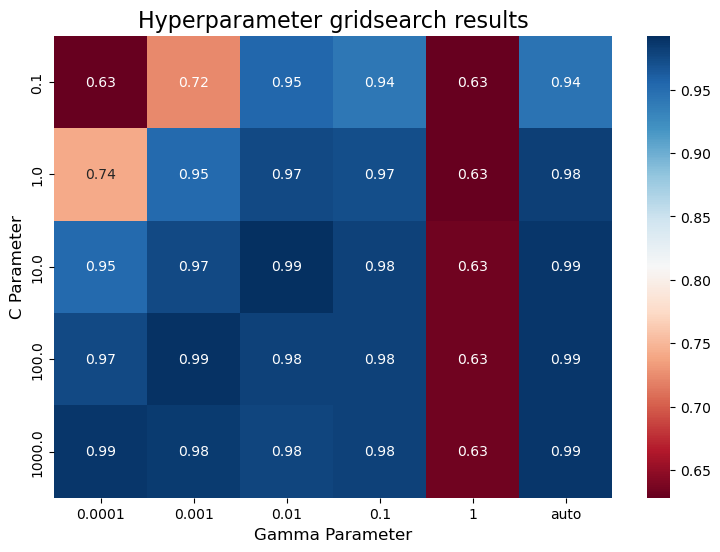

In [54]:
# Pull results from grid search, for example for the RBF kernel 
results = pd.DataFrame(grid_search.cv_results_)
results = results[results['param_kernel']=='rbf']
hm_data = results.pivot(index='param_C', columns='param_gamma', values='mean_test_score')

# Plot heatmap
fix, ax = plt.subplots(figsize=(9, 6))

ax = sns.heatmap(hm_data,
                 annot=True,
                 cmap='RdBu',
                 linecolor='white')

ax.set_title('Hyperparameter gridsearch results', fontsize=16)
ax.set_ylabel('C Parameter', fontsize=12)
ax.set_xlabel('Gamma Parameter', fontsize=12)

plt.show()

Let's create the final optimized model using the best parameters as detected from the exhaustive grid search: 

In [55]:
# Build the classifier using the optimal parameters detected by the tuning process

# Save the result cv_svm.best_estimator_ into a new variable svm_opt 
svm_opt = grid_search.best_estimator_

# Fit the optimal model svm_opt to the training set. 
svm_opt.fit(X_train, y_train)

# Predict the test data X_test. Use svm_opt.predict() 
y_pred = svm_opt.predict(X_test)

# Report the final overall accuracy using metrics.accuracy_score(). 
print('Test set accuracy: ', metrics.accuracy_score(y_test, y_pred))

Test set accuracy:  0.9590643274853801


In [56]:
# Checking performance our model with metrics.classification report() 
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       107
           1       0.98      0.91      0.94        64

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171



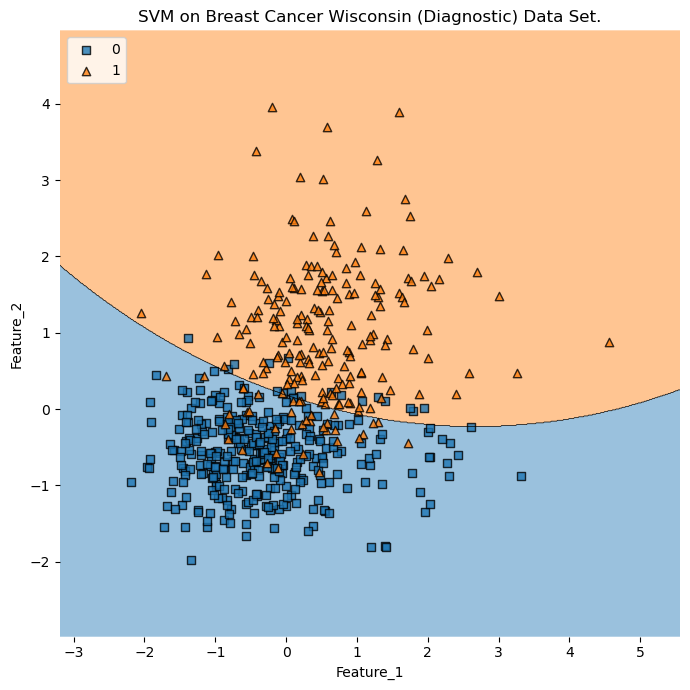

In [57]:
# Plot the SVM boundaries 
plot_svm_boundaries(svm_opt, 1, 2)